In [54]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import glob, csv
from matplotlib.ticker import AutoMinorLocator

In [52]:
%matplotlib widget

## May 2, 2025 (LNA + Trx) and FEM comparison

### Test Setup
- **Signal Source:** -75 dBm tone from signal generator
- **Comparisons:** FEM vs. LNA + Trx
- **Measurement Tool:** Keysight FieldFox N9914A
- **LNA:** ZX60-P103LN+
### Results
- The **FEM provides ~50 dB gain**.
- The **PAMs contribute an additional ~25 dB gain**.
- The **LNA + Trx configuration closely matches** the output power level of the FEM when the same input signal is used.

### Data Location
All raw measurement data and analysis (including a Jupyter notebook) are available https://github.com/EIGSEP/RFoF_module/tree/main 

In [23]:
def load_csv(filename):
    data = {"frequency": [], "power": []}
    with open(filename, "r") as f:
        reader = csv.reader(f)
        begin_found = False
        for row in reader:
            if not row or row[0].startswith("!"):
                continue
            if row[0] == "BEGIN":
                begin_found = True
                continue
            if begin_found:
                try:
                    freq = float(row[0])
                    power = float(row[1])
                    data["frequency"].append(freq)
                    data["power"].append(power)
                except (ValueError, IndexError):
                    continue
    return data

data_dir = "/Users/rs_mbpro14/RAL/RFoF/may2_trx_fem_tests" 
csv_files = glob.glob(os.path.join(data_dir, "*.csv"))

all_data = {}
for file in csv_files:
    fname = os.path.basename(file)
    all_data[fname] = load_csv(file)

In [45]:
def plot_data(all_data, title="input power comparison", xlim=None, ylim=None):
    """
    Plot power vs frequency for multiple CSV datasets.

    Parameters
    ----------
    all_data : dict
        Dictionary of {filename: {"frequency": [...], "power": [...]}}.
    title : str
    xlim : tuple or None
        Frequency axis limits in MHz.
    ylim : tuple or None
        Power axis limits in dBm (e.g., (-100, 0)).
    """
    sns.set_context("paper")
    sns.set_style("whitegrid")
    sns.set_palette("colorblind")

    fig, ax = plt.subplots(figsize=(12, 6))

    for fname, dataset in sorted(all_data.items()):
        freqs_mhz = [f / 1e6 for f in dataset["frequency"]]
        powers = dataset["power"]
        sns.lineplot(x=freqs_mhz, y=powers, label=os.path.splitext(fname)[0], ax=ax, lw=2.0)

    ax.set_title(title, fontsize=12)
    ax.set_xlabel("Frequency (MHz)", fontsize=12)
    ax.set_ylabel("Power (dBm)", fontsize=12)

    if xlim:
        ax.set_xlim(*xlim)
    if ylim:
        ax.set_ylim(*ylim)

    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())

    ax.tick_params(axis='both', which='major', direction='in', length=6, width=1, bottom=True, left=True)
    ax.tick_params(axis='both', which='minor', direction='in', length=3, width=0.8, bottom=True, left=True)

    for spine in ax.spines.values():
        spine.set_linewidth(1.2)

    ax.legend(
        title="File",
        fontsize=11,
        ncol=3,
        title_fontsize=11,
        loc="upper right",
        borderaxespad=0,
        frameon=True
    )

    fig.tight_layout()
    plt.show()


In [47]:
def plot_comparison(data_dict, labels=None, title=None, xlim=None, ylim=None):
    """
    Plot one or two FieldFox traces for comparison.

    Parameters
    ----------
    data_dict : list of dict
        List of 1–2 datasets, each with "frequency" and "power" keys.
    labels : list of str or None
        Labels for the traces (e.g., filenames or conditions).
    title : str
    xlim : tuple or None
        Frequency axis limits in MHz.
    ylim : tuple or None
        Power axis limits in dBm.
    """
    sns.set_context("paper")
    sns.set_style("whitegrid")
    sns.set_palette("colorblind")

    fig, ax = plt.subplots(figsize=(10, 5))

    for i, dataset in enumerate(data_dict):
        freqs_mhz = [f / 1e6 for f in dataset["frequency"]]
        powers = dataset["power"]
        label = labels[i] if labels else f"Trace {i+1}"
        sns.lineplot(x=freqs_mhz, y=powers, label=label, ax=ax, lw=2.3)

    ax.set_title(title, fontsize=12)
    ax.set_xlabel("Frequency (MHz)", fontsize=12)
    ax.set_ylabel("Power (dBm)", fontsize=12)

    if xlim:
        ax.set_xlim(*xlim)
    if ylim:
        ax.set_ylim(*ylim)

    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())

    ax.tick_params(axis='both', which='major', direction='in', length=6, width=1, bottom=True, left=True)
    ax.tick_params(axis='both', which='minor', direction='in', length=3, width=0.8, bottom=True, left=True)

    for spine in ax.spines.values():
        spine.set_linewidth(1.2)

    ax.legend(loc="upper right", fontsize=10, frameon=True)
    fig.tight_layout()
    plt.show()

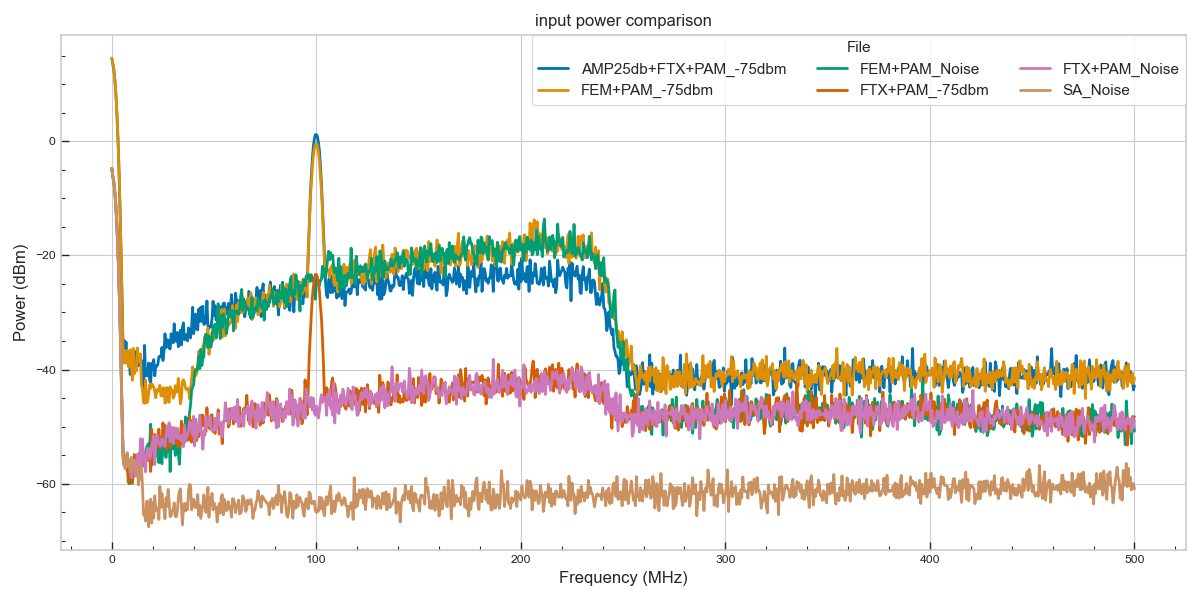

In [53]:
plot_data(all_data)

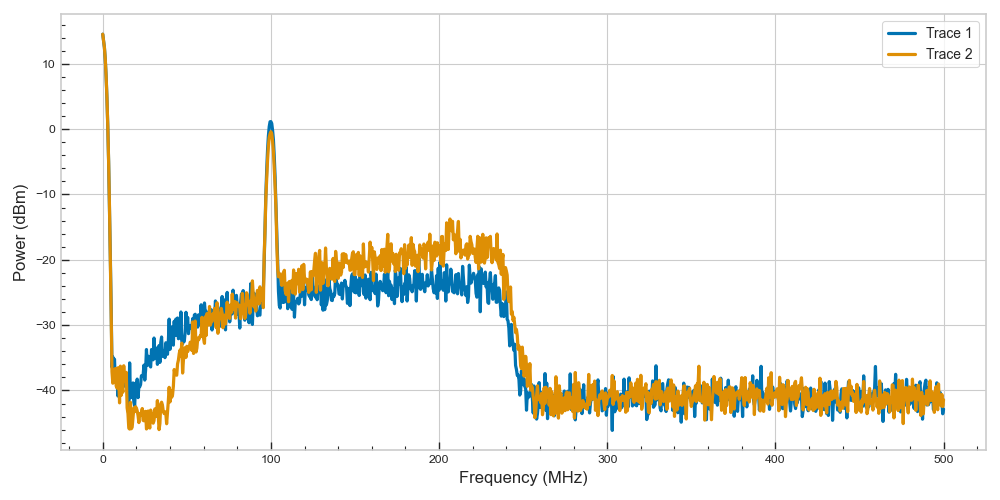

In [55]:
plot_comparison(data_dict=[all_data["AMP25db+FTX+PAM_-75dbm.csv"], all_data["FEM+PAM_-75dbm.csv"]])

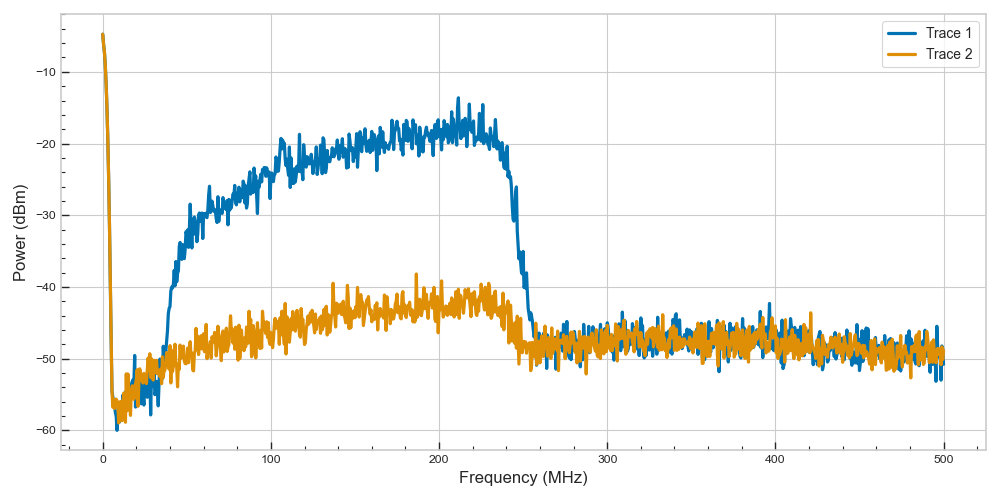

In [56]:
plot_comparison(data_dict=[all_data["FEM+PAM_Noise.csv"], all_data["FTX+PAM_Noise.csv"]])